Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Datasets
Datasets loaded successfully.
Converting to Datetime
Aligning Datasets
Datasets aligned and merged successfully.
Verifying the Merge
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00  

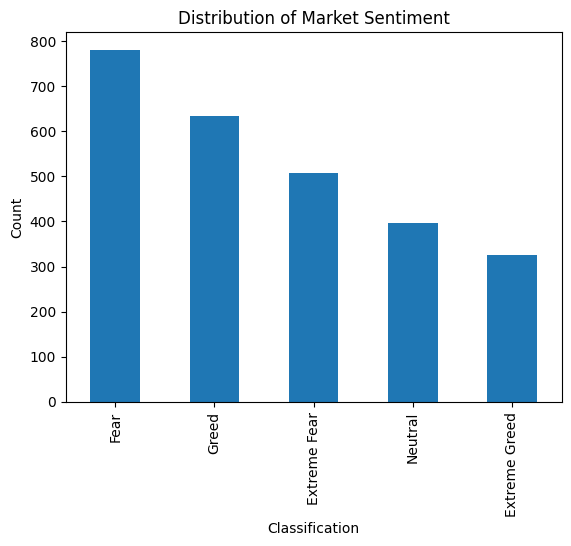

Sentiment distribution analysis and plot completed.
Analyzing Descriptive Statistics
count    211218.000000
mean         48.549304
std         917.989791
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.790132
max      135329.090100
Name: Closed PnL, dtype: float64
          Closed PnL      Size USD   Size Tokens
count  211218.000000  2.112180e+05  2.112180e+05
mean       48.549304  5.639192e+03  4.623341e+03
std       917.989791  3.657557e+04  1.042744e+05
min   -117990.104100  0.000000e+00  8.740000e-07
25%         0.000000  1.937900e+02  2.940000e+00
50%         0.000000  5.970200e+02  3.200000e+01
75%         5.790132  2.058878e+03  1.878900e+02
max    135329.090100  3.921431e+06  1.582244e+07
Descriptive statistics analysis completed.
Analyzing Performance by Side
Side
BUY     35.693245
SELL    60.713803
Name: Closed PnL, dtype: float64
Performance by side analysis completed.
Analyzing Performance by Sentiment
                Closed PnL     Size

/tmp/ipython-input-18-2622153954.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby(pd.qcut(merged_df['value'], q=4))['Closed PnL'].mean())


In [18]:
from google.colab import drive
drive.mount('/content/drive')  # Already mounted, but included for completeness

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

print("Loading Datasets")
sentiment_df = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
trader_df = pd.read_csv('/content/drive/MyDrive/historical_data.csv')
print("Datasets loaded successfully.")


print("Converting to Datetime")
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')


print("Aligning Datasets")
trader_df['Date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date
merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='inner')
print("Datasets aligned and merged successfully.")


print("Verifying the Merge")
print(merged_df.head())
print(merged_df.columns.tolist())
print("Merge verification completed.")


print("Analyzing Date Ranges")
print("Trader Date Range:", trader_df['Timestamp IST'].min(), trader_df['Timestamp IST'].max())
print("Sentiment Date Range:", sentiment_df['date'].min(), sentiment_df['date'].max())
print("Date range analysis completed.")


print("Analyzing Sentiment Distribution")
print(sentiment_df['classification'].value_counts())
sentiment_df['classification'].value_counts().plot(kind='bar')
plt.title('Distribution of Market Sentiment')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()
print("Sentiment distribution analysis and plot completed.")


print("Analyzing Descriptive Statistics")
print(merged_df['Closed PnL'].describe())
print(merged_df[['Closed PnL', 'Size USD', 'Size Tokens']].describe())
print("Descriptive statistics analysis completed.")


print("Analyzing Performance by Side")
print(merged_df.groupby('Side')['Closed PnL'].mean())
print("Performance by side analysis completed.")


print("Analyzing Performance by Sentiment")
performance_by_sentiment = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Size USD': 'mean',
    'Size Tokens': 'mean'
})
print(performance_by_sentiment)
print("Performance by sentiment analysis completed.")


print("Performing Statistical Test")
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL'].dropna()
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL'].dropna()
t_stat, p_value = ttest_ind(fear_pnl, greed_pnl)
print(f"T-test (Fear vs. Greed): t-stat={t_stat}, p-value={p_value}")
print("Statistical test completed.")


print("Analyzing Top Accounts")
print(merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head())
print("Top accounts analysis completed.")


print("Analyzing Hourly Trends")
merged_df['Hour'] = merged_df['Timestamp IST'].dt.hour
print(merged_df.groupby('Hour')['Closed PnL'].mean())
print("Hourly trends analysis completed.")


print("Analyzing Sentiment Value Impact")
print(merged_df.groupby(pd.qcut(merged_df['value'], q=4))['Closed PnL'].mean())
print("Sentiment value impact analysis completed.")